In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv(r"C:\Users\Sarthak Sarkar\Downloads\Iris (1).csv")

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_enc'] = le.fit_transform(df['Species'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


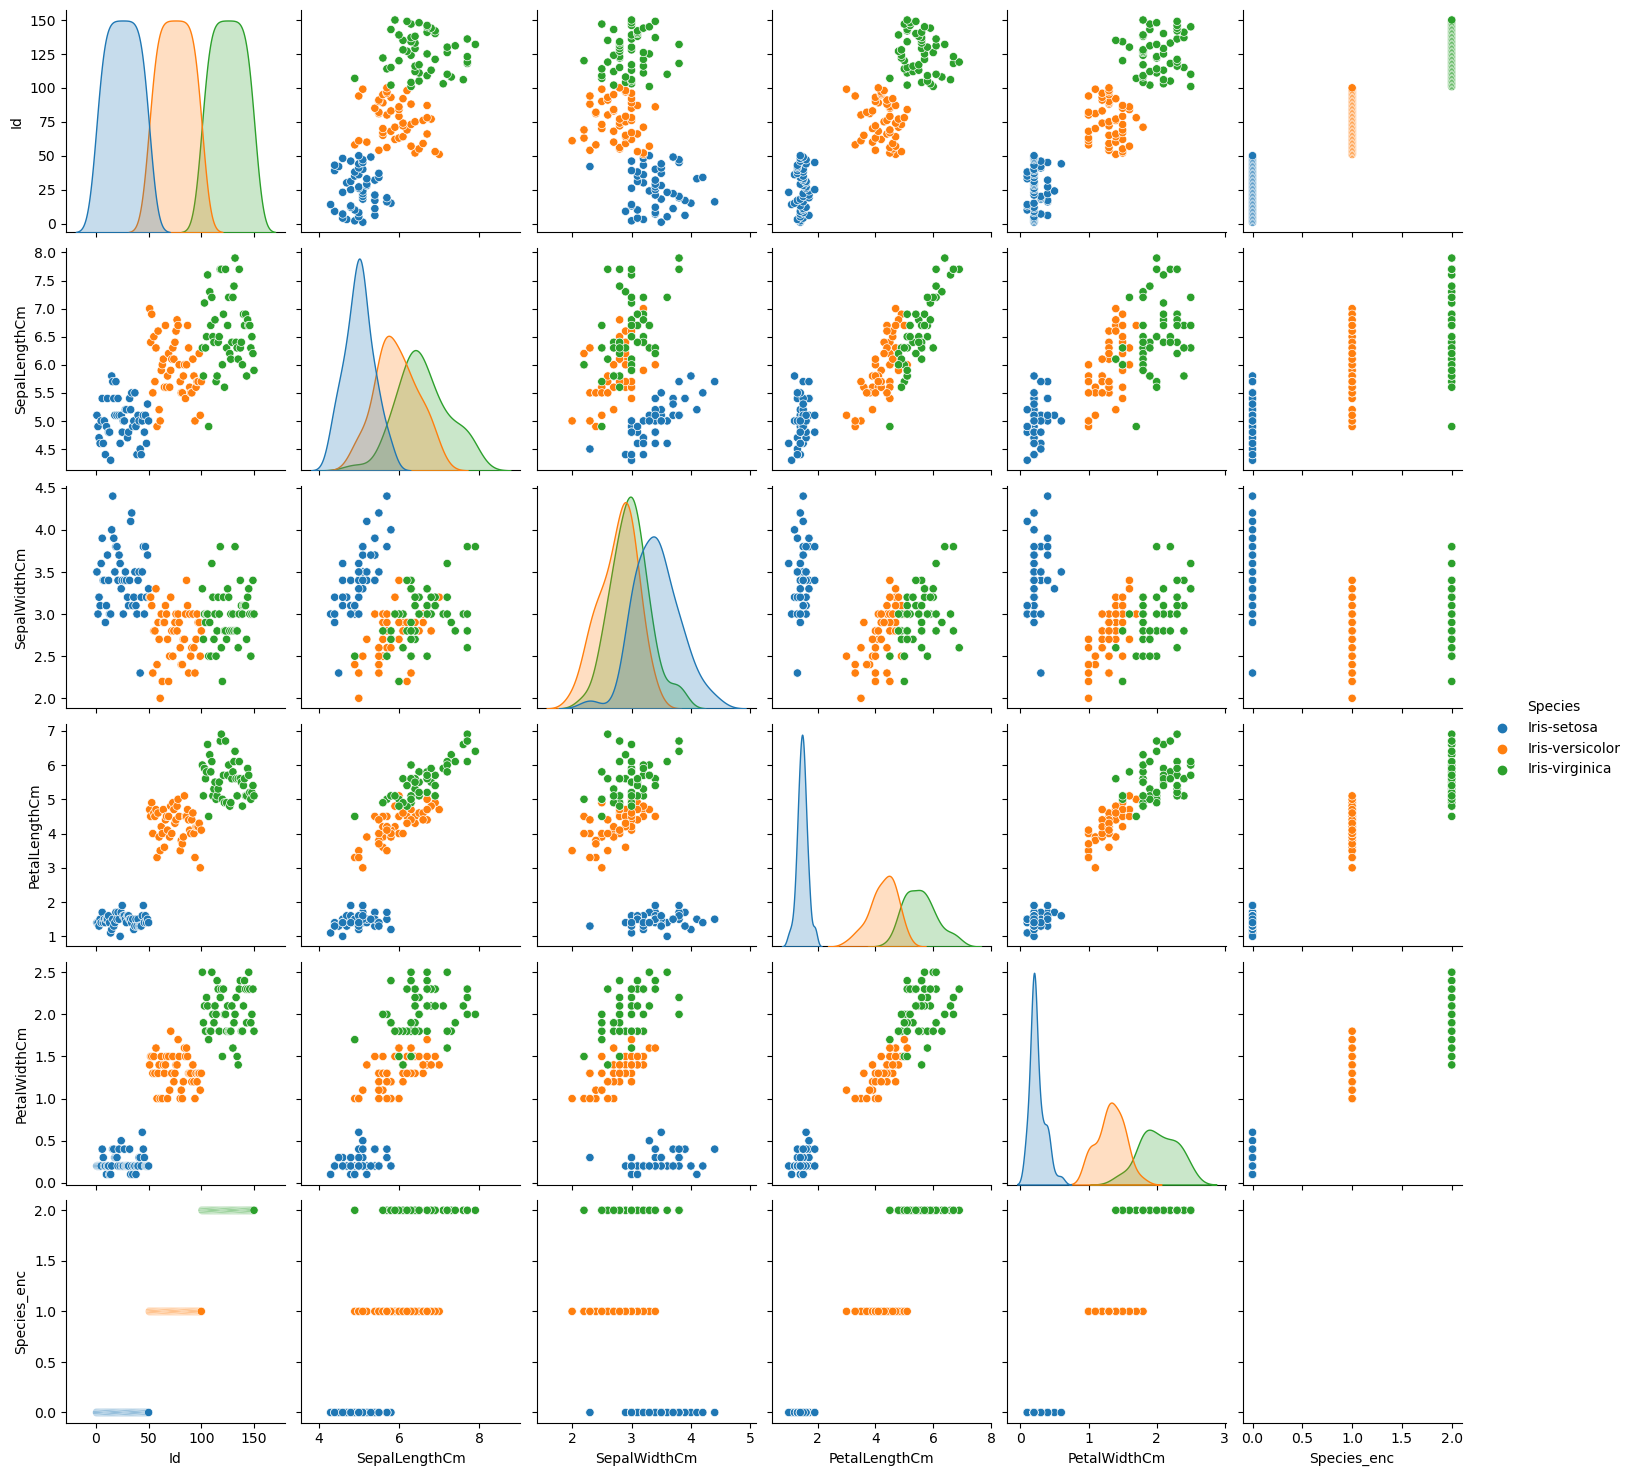

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Species')
plt.show()


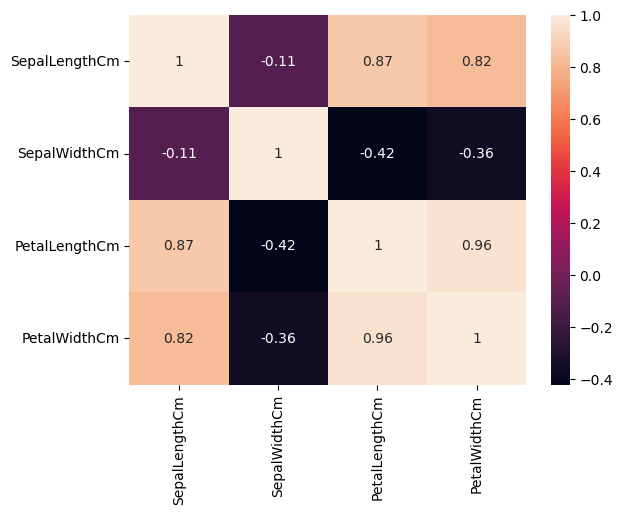

In [7]:
sns.heatmap(df.iloc[:,1:5].corr(), annot=True)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:5]
y = df['Species_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:5]
y = df['Species_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred, target_names=le.classes_))
print(confusion_matrix(y_test, pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn, target_names=le.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt, target_names=le.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5)
print("Mean CV accuracy:", scores.mean())


Mean CV accuracy: 0.9733333333333334


In [16]:
import pandas as pd
imp = pd.DataFrame({'feature': X.columns,
                    'importance': dt.feature_importances_}).sort_values(by='importance', ascending=False)
print(imp)



         feature  importance
2  PetalLengthCm    0.579077
3   PetalWidthCm    0.420923
0  SepalLengthCm    0.000000
1   SepalWidthCm    0.000000


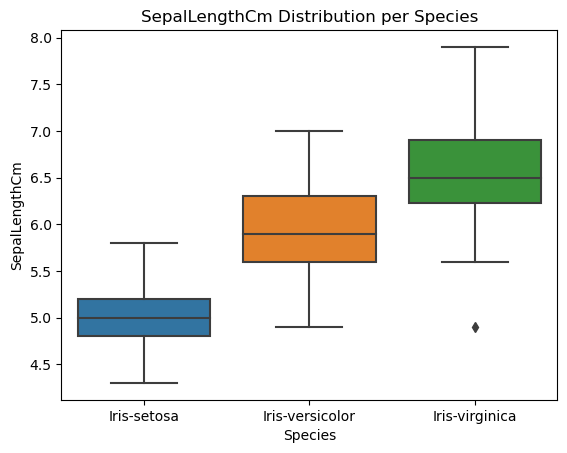

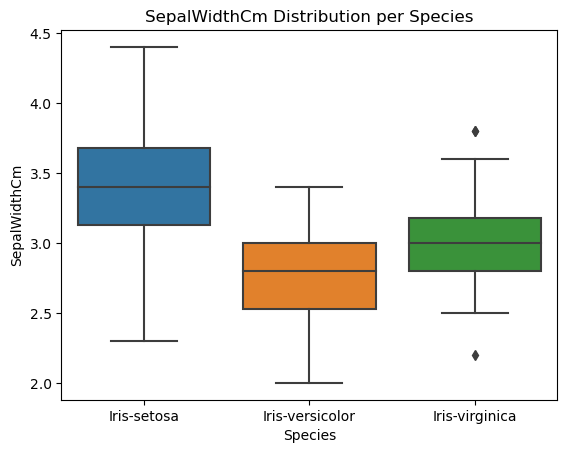

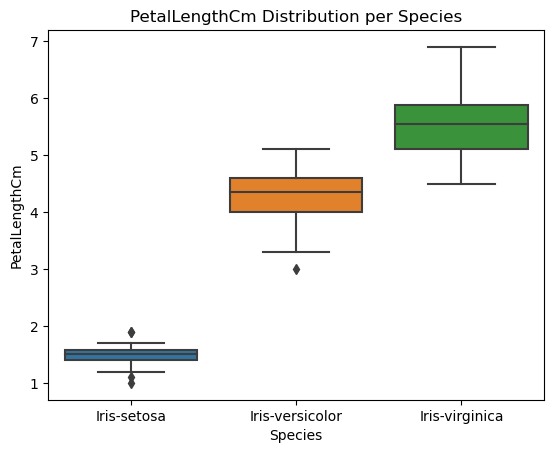

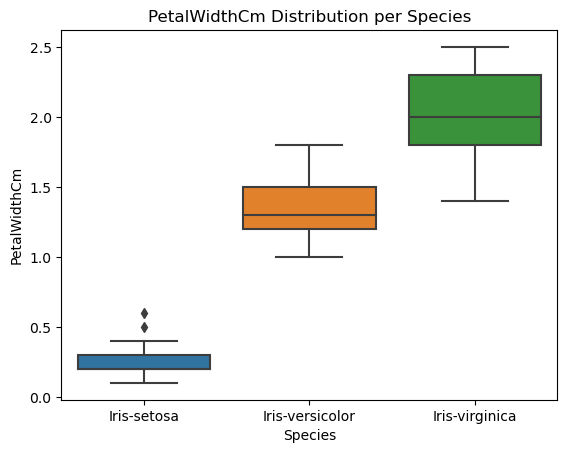

In [18]:
for feature in df.columns[1:5]:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f"{feature} Distribution per Species")
    plt.show()



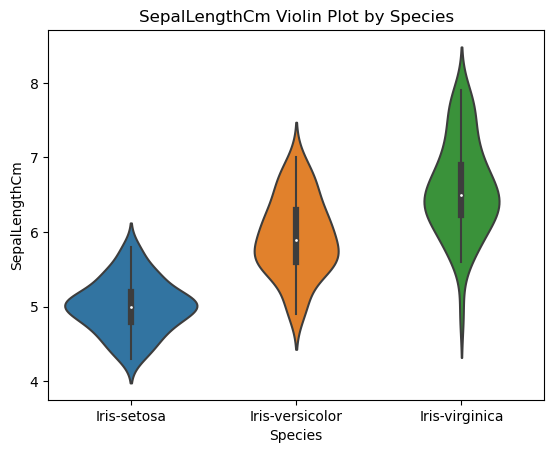

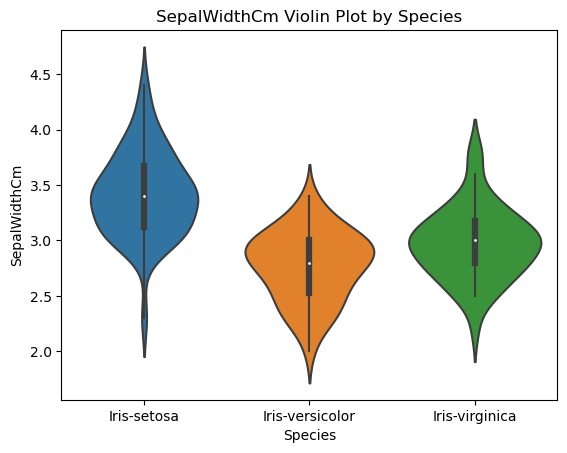

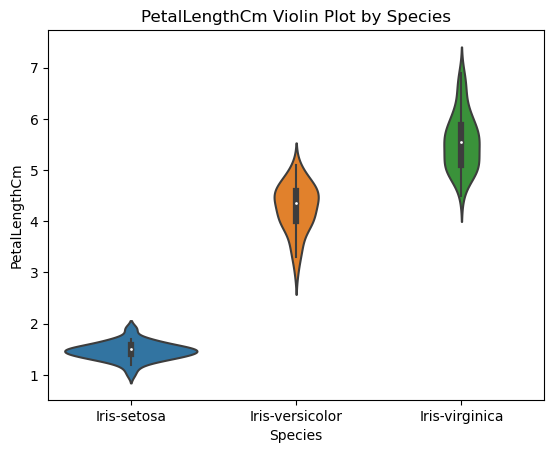

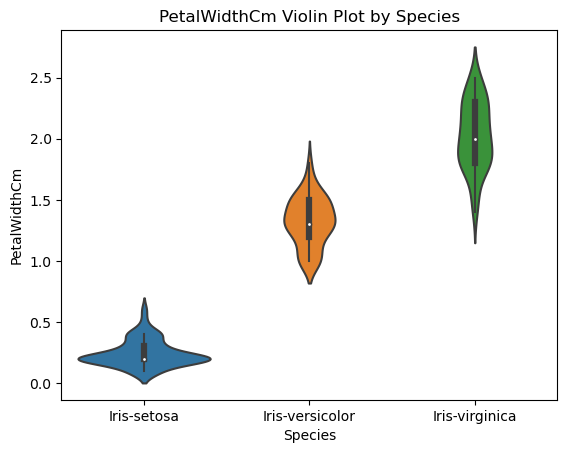

In [19]:
for feature in df.columns[1:5]:
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f"{feature} Violin Plot by Species")
    plt.show()


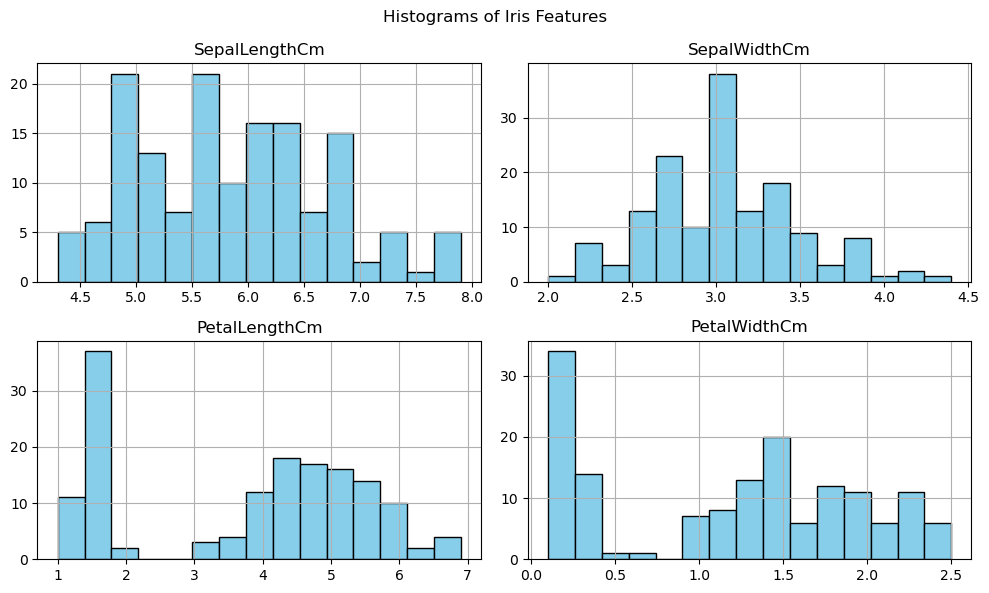

In [20]:
df.iloc[:,1:5].hist(bins=15, figsize=(10, 6), layout=(2,2), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()


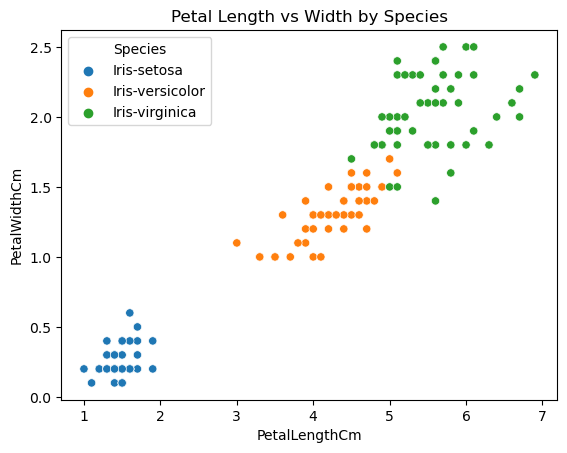

In [22]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title("Petal Length vs Width by Species")
plt.show()



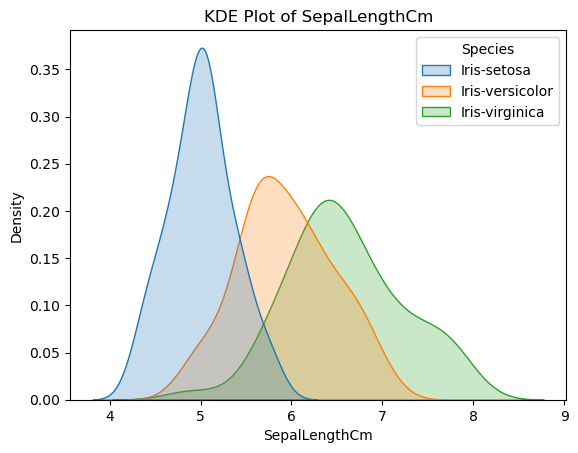

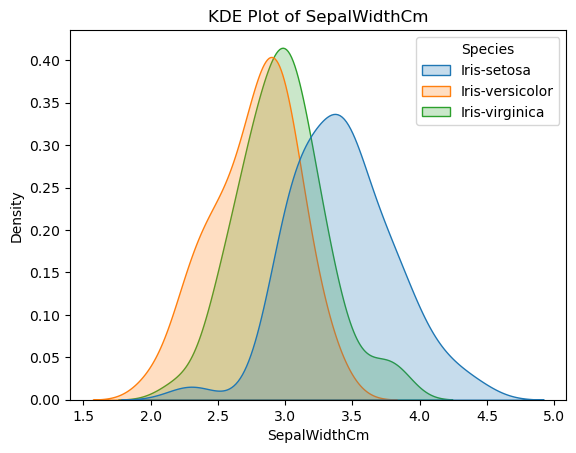

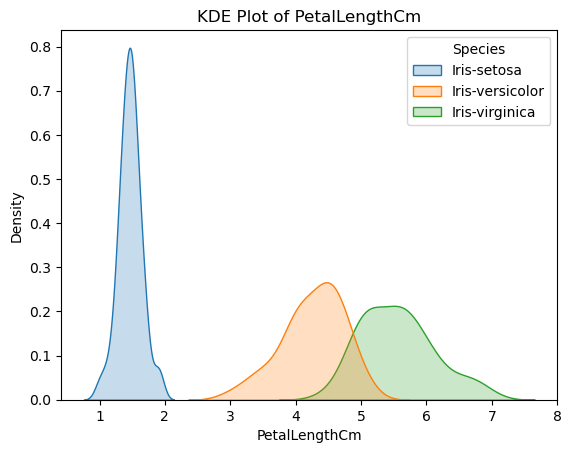

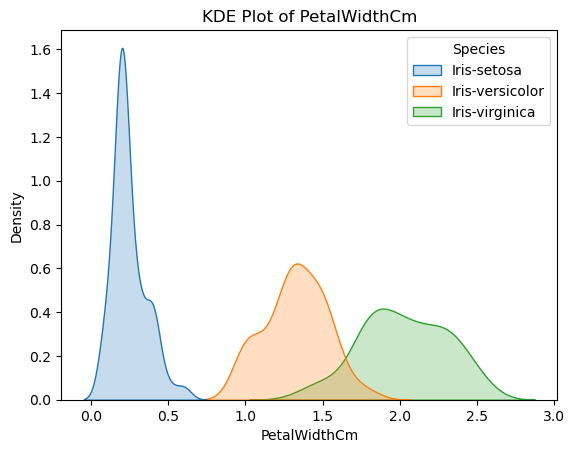

In [23]:
for feature in df.columns[1:5]:
    sns.kdeplot(data=df, x=feature, hue="Species", fill=True)
    plt.title(f"KDE Plot of {feature}")
    plt.show()


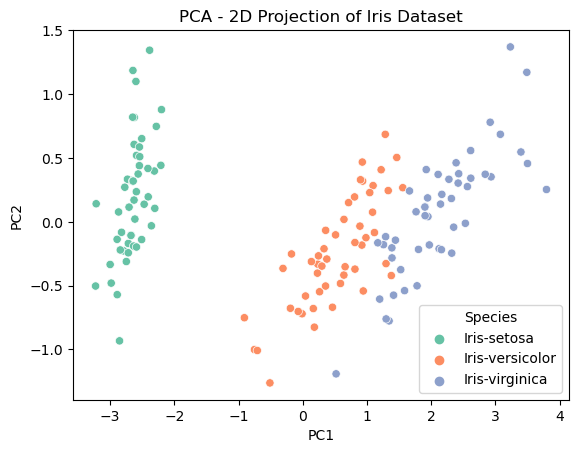

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df.iloc[:,1:5])
df['PC1'], df['PC2'] = components[:,0], components[:,1]

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Species', palette='Set2')
plt.title("PCA - 2D Projection of Iris Dataset")
plt.show()


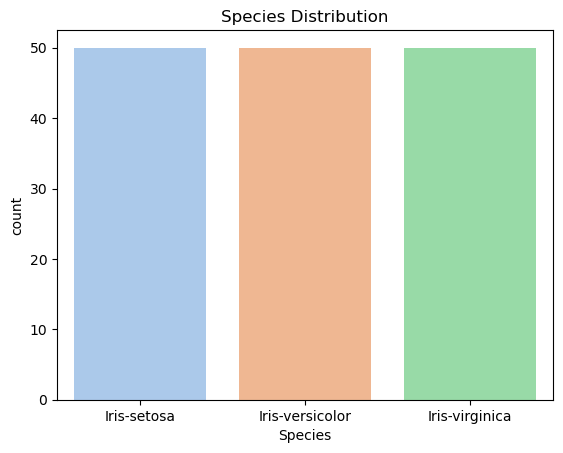

In [25]:
sns.countplot(x='Species', data=df, palette='pastel')
plt.title("Species Distribution")
plt.show()
